<a href="https://colab.research.google.com/github/SKitavi/Smarthive-ai/blob/main/SmartHive_Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SmartHive AI Checkpoints

**Objectives:**

*  Build a data-driven model to segment customers based on their purchasing behaviour, demographics, preferences, and engagement patterns..

*  Measure and Evaluate the Impact of Segmentation Strategies


*   Deploy these capabilities through an interactive dashboard,or web application enabling marketing teams to visualise segments, execute targeted campaigns, and monitor their performance in real-time.





**Data Collection and Preparation**

For this project, we will mainly be using the Customer Data.csv dataset.

The dataset contains 8951 entries/rows and 18 columns. It comprises of attributes related to customers and their purchasing behaviour.

Key Attributes:

***Customer Information***

**1. CUST_ID**: A unique identifier assigned to each customer.

**2. CREDIT_LIMIT**: The maximum amount of credit a customer is allowed to use.

**3. TENURE**: The length of time the customer has been with the company or has had the credit account.


***Purchase and Spending Behavior***  

**4. BALANCE:** The current outstanding balance on the customer's account.

**5. BALANCE_FREQUENCY**: The frequency with which the customer pays off their balance. (e.g., monthly, quarterly)

**6. PURCHASES**: The total amount of purchases made by the customer.

**7. ONEOFF_PURCHASES**: The total amount of one-time purchases made by the customer.

**8. INSTALLMENTS_PURCHASES**: The total amount of purchases made on installments by the customer.

**9. CASH_ADVANCE**: The total amount of cash withdrawn from the credit account.

**10. PURCHASES_FREQUENCY**: The frequency with which the customer makes purchases.

**11. ONEOFF_PURCHASES_FREQUENCY**: The frequency with which the customer makes one-time purchases.

**12. PURCHASES_INSTALLMENTS_FREQUENCY**: The frequency with which the customer makes purchases on installments.

**13. CASH_ADVANCE_FREQUENCY**: The frequency with which the customer withdraws cash from the credit account.

**14. PURCHASES_TRX**: The number of purchase transactions made by the customer.

**15. CASH_ADVANCE_TRX**: The number of cash advance transactions made by the customer.


***Payment Information***

**16. PAYMENTS**: The total amount of payments made by the customer.

**17. MINIMUM_PAYMENTS**: The minimum payment amount required from the customer.

**18. PRC_FULL_PAYMENT**: The percentage of times the customer has paid their balance in full.



## **1. Importing Necessary Libraries**

> Add blockquote



In [1]:
# !pip install pandas numpy

In [2]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

## **2. Loading the CSV file**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Loading the csv
df = pd.read_csv('/content/drive/MyDrive/Market Segmentation/Customer Data.csv')


#**Basic Previews of the Dataset**

In [5]:
#preview of the entries
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [7]:
#shape of dataset
df.shape

(8950, 18)

There are 8950 rows and 18 columns after cleaning.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

To view the data types and characteristics of the data we have.


In [9]:
#for the numeric description of our attribute values
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
#Output columns after dropping MINIMUM_PAYMENTS
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [11]:
#checking ofr duplicates
df.duplicated().sum()

0

Our data has no duplicates and therefore we can now do EDA.

In [12]:
#Summary Statistics for Categorical and Numerical Features

print("\nSummary Statistics:")
df.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# **3. Handle Missing Values:**

In [13]:
#identifying the percentage of missing values
df.isnull().sum() / len(df) * 100

,0
CUST_ID,0.000000
BALANCE,0.000000
BALANCE_FREQUENCY,0.000000
PURCHASES,0.000000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,0.000000
PURCHASES_FREQUENCY,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000


**Observations**

It seems there are columns with null values in the CSV that could skew our analysis.

*   CREDIT_LIMIT contains 1 missing value. This can be handled by strategically imputing according to the TENURE of the customer and PURCHASES_TRX which is the number of purchase transactions made with have
a direct impact on the credit limit.
*   MINIMUM_PAYMENTS contains the highest number of missing values and this could either be due to error or many products not having a minimum payment amount. Seeing as the minimum payment amount is not a key factor in customer segmentation, and the column has no predictive value, the column can be eliminated.





In [14]:
# Identify the row with the missing value
missing_credit_limit_index = df[df['CREDIT_LIMIT'].isnull()].index[0]

print("The row with the missing value in CREDIT_LIMIT is:", missing_credit_limit_index)

#Output the row
df.loc[missing_credit_limit_index]

The row with the missing value in CREDIT_LIMIT is: 5203


,5203
CUST_ID,C15349
BALANCE,18.400472
BALANCE_FREQUENCY,0.166667
PURCHASES,0.0
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,0.0
CASH_ADVANCE,186.853063
PURCHASES_FREQUENCY,0.0
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0


In [15]:
# Check if the condition is met for the specific row
if (df.loc[5203, 'PURCHASES_TRX'] < 3) and (df.loc[5203, 'TENURE'] < 7) and pd.isnull(df.loc[5203, 'CREDIT_LIMIT']):
    df.loc[5203, 'CREDIT_LIMIT'] = 500

#Output row after imputation
df.loc[5203]

,5203
CUST_ID,C15349
BALANCE,18.400472
BALANCE_FREQUENCY,0.166667
PURCHASES,0.0
ONEOFF_PURCHASES,0.0
INSTALLMENTS_PURCHASES,0.0
CASH_ADVANCE,186.853063
PURCHASES_FREQUENCY,0.0
ONEOFF_PURCHASES_FREQUENCY,0.0
PURCHASES_INSTALLMENTS_FREQUENCY,0.0


In [16]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [17]:
# filling mean value in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
#dropping the ID column
df = df.drop(columns=['CUST_ID'])

# **5. Exploratory Data Analysis (EDA)**

Graphical EDA is done to analyse and visualise data in our dataset to uncover patterns, trends and identify outliers or anomalies.

**(a) Univariate Analysis**

Analyzing individual attributes to understand their distributions, summary statistics, and outliers.

In [18]:
# # 2. Box plot of credit limits by tenure
# import seaborn as sns
# sns.boxplot(x='TENURE', y='CREDIT_LIMIT', data=df)
# plt.title('Bivariate Analysis: Credit Limit by Tenure')
# plt.xlabel('Tenure')
# plt.ylabel('Credit Limit')
# plt.show()

In [19]:
import scipy.stats as stats

# Calculate Z-scores
z_scores = stats.zscore(df['PURCHASES'])

# Identify outliers
outliers_z_score = df[(z_scores > 3) | (z_scores < -3)]
print("Outliers based on Z-score:")
outliers_z_score

Outliers based on Z-score:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
125,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
153,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,26,216,20000.0,11717.307940,6042.391629,0.000000,12
171,975.942008,1.000000,10221.35,7141.38,3079.97,1620.685551,1.000000,1.000000,0.833333,0.583333,18,130,10500.0,10693.495850,347.641073,0.750000,12
204,4559.779234,1.000000,10848.50,8208.00,2640.50,0.000000,1.000000,0.666667,1.000000,0.000000,0,123,7500.0,9423.715495,2925.275522,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,561.003319,1.000000,11577.00,10975.00,602.00,875.583070,1.000000,1.000000,0.500000,0.250000,6,97,5500.0,12148.503510,188.413837,0.666667,12
7378,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12
7553,2017.391656,1.000000,12024.37,11224.10,800.27,0.000000,1.000000,1.000000,0.500000,0.000000,0,133,8000.0,11516.392320,556.651236,0.333333,12
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12


In [20]:
df = df[(z_scores <= 3) & (z_scores >= -3)]


In [21]:
df.shape

(8815, 17)

Using the IQR method will cap the outliers at the upper and lower bounds. This is to handle the common skewness.

In [22]:
# #Using IQR to handle outliers
# import numpy as np

# # List of columns to check for outliers
# numeric_columns = ['CREDIT_LIMIT', 'TENURE', 'BALANCE', 'BALANCE_FREQUENCY',
#                    'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
#                    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
#                    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
#                    'PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'PAYMENTS', 'PRC_FULL_PAYMENT']

# # Function to handle outliers using the IQR method
# def handle_outliers_iqr(df, columns=df.columns):
#     for column in columns:
#         # Calculate Q1 (25th percentile) and Q3 (75th percentile)
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1  # Interquartile range

#         # Define the bounds for outliers
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Capping the outliers
#         df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
#         df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

#     return df

# # Apply the outlier handling function to your dataset
# df = handle_outliers_iqr(df)

# # Check if the outliers have been capped by describing the dataset again
# df.boxplot(figsize=(10, 10))
# plt.xticks(rotation=90)
# plt.show()

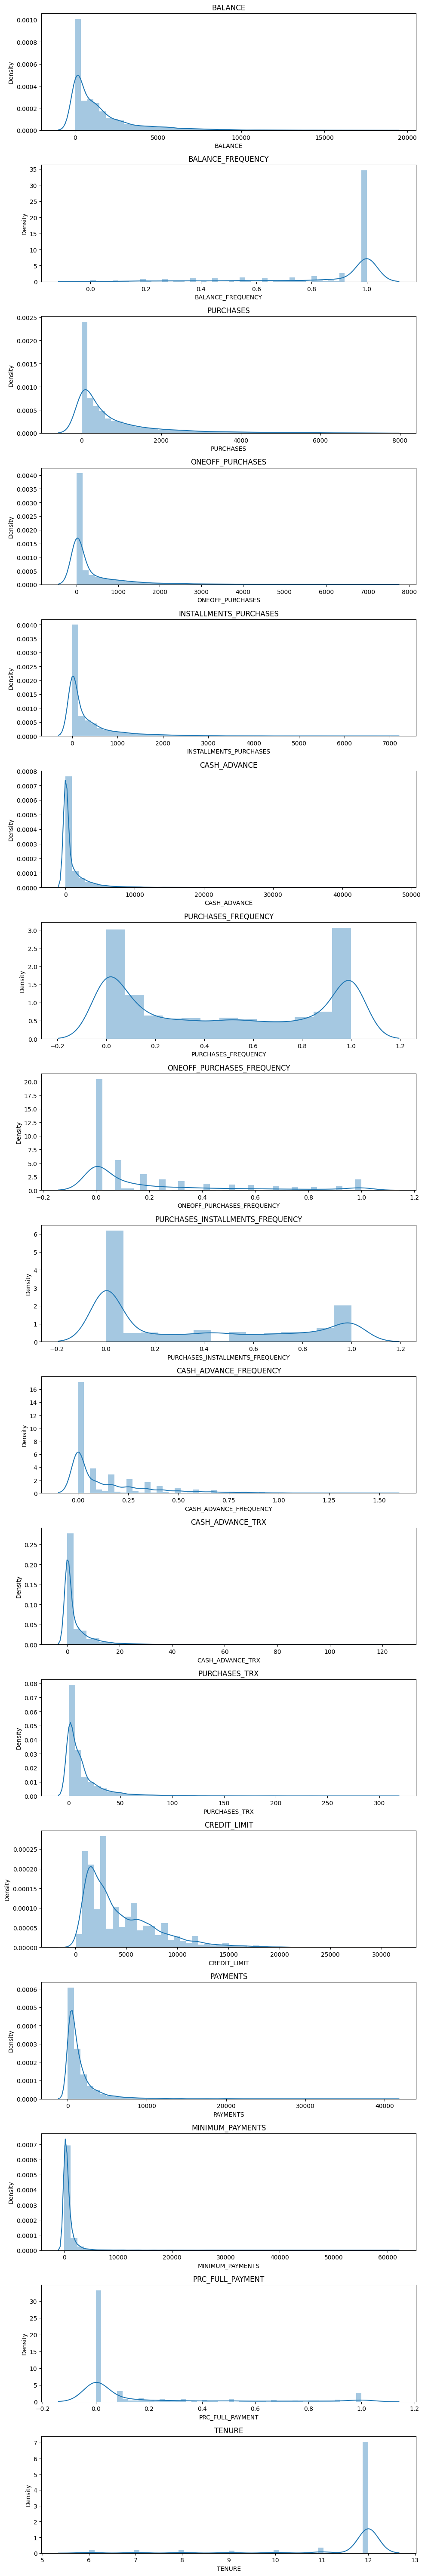

In [23]:
import seaborn as sns
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'label':'KDE'})
    plt.title(df.columns[i])
plt.tight_layout()

# Key Observations:

1. The distribution of the **CREDIT_LIMIT** is right-skewed, with the majority of customers having lower credit limits. There are a few customers with very high credit limits, which creates a long right tail.


2. The **TENURE** distribution is bimodal. Many customers seem to have tenures of 12 years, indicating either a cap or a large cohort of long-term customers, with another peak at lower tenure values.


3. **BALANCE** also shows a right-skewed distribution, where most customers have low balances, but some customers have significantly higher balances, leading to a long tail.


4. The **BALANCE_FREQUENCY** shows that most customers have a high frequency (close to 1), suggesting that most customers check or pay off their balances frequently.


5. The distribution for **PURCHASES** is heavily right-skewed, with most customers having low total purchase amounts. A small number of customers, however, have very large purchase values, contributing to the long tail on the right.


6. Both **ONEOFF_PURCHASES** and **INSTALLMENTS_PURCHASES** are right-skewed. Most customers make low or no one-off purchases or installment purchases, while a few have large amounts.


7. The **CASH_ADVANCE** distribution is also right-skewed. The majority of customers either do not use or have low cash advances, but a small number of customers withdraw significant amounts.
Purchases Frequency:

8. **PURCHASES_FREQUENCY** has a left-skewed distribution, with many customers making purchases frequently (values close to 1). This suggests that a significant portion of customers make regular purchases.


9. The distribution of **ONEOFF_PURCHASES_FREQUENCY** is right-skewed, with most customers having low frequencies for one-off purchases.
Purchases Installments Frequency:

10. **PURCHASES_INSTALLMENTS_FREQUENCY** is left-skewed, indicating that most customers frequently make purchases via installments.


11. The **CASH_ADVANCE_FREQUENCY** distribution shows that most customers have a very low frequency of cash advances, with some customers having occasional cash advances.


12. The distribution of **PURCHASES_TRX **is right-skewed, showing that most customers make a small number of transactions, while a few customers have many transactions.


13. The **PAYMENTS** distribution is right-skewed, with most customers making low total payments, but a few make significantly higher payments.
Percent Full Payment (PRC_FULL_PAYMENT):

14. The **PRC_FULL_PAYMENT** distribution is skewed towards higher values, with a large proportion of customers often paying off their balances in full.

**(b) Bivariate Analysis**

Analyzing relationships between two variables, looking for correlations and patterns (such as between spending behavior and credit limits).

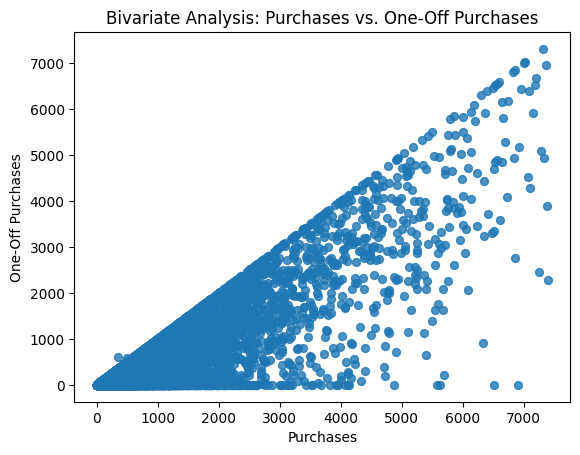

In [24]:

df.plot(kind='scatter', x='PURCHASES', y='ONEOFF_PURCHASES', s=32, alpha=.8)
plt.title('Bivariate Analysis: Purchases vs. One-Off Purchases')
plt.xlabel('Purchases')
plt.ylabel('One-Off Purchases')
plt.show()
# plt.gca().spines[['top', 'right',]].set_visible(False)

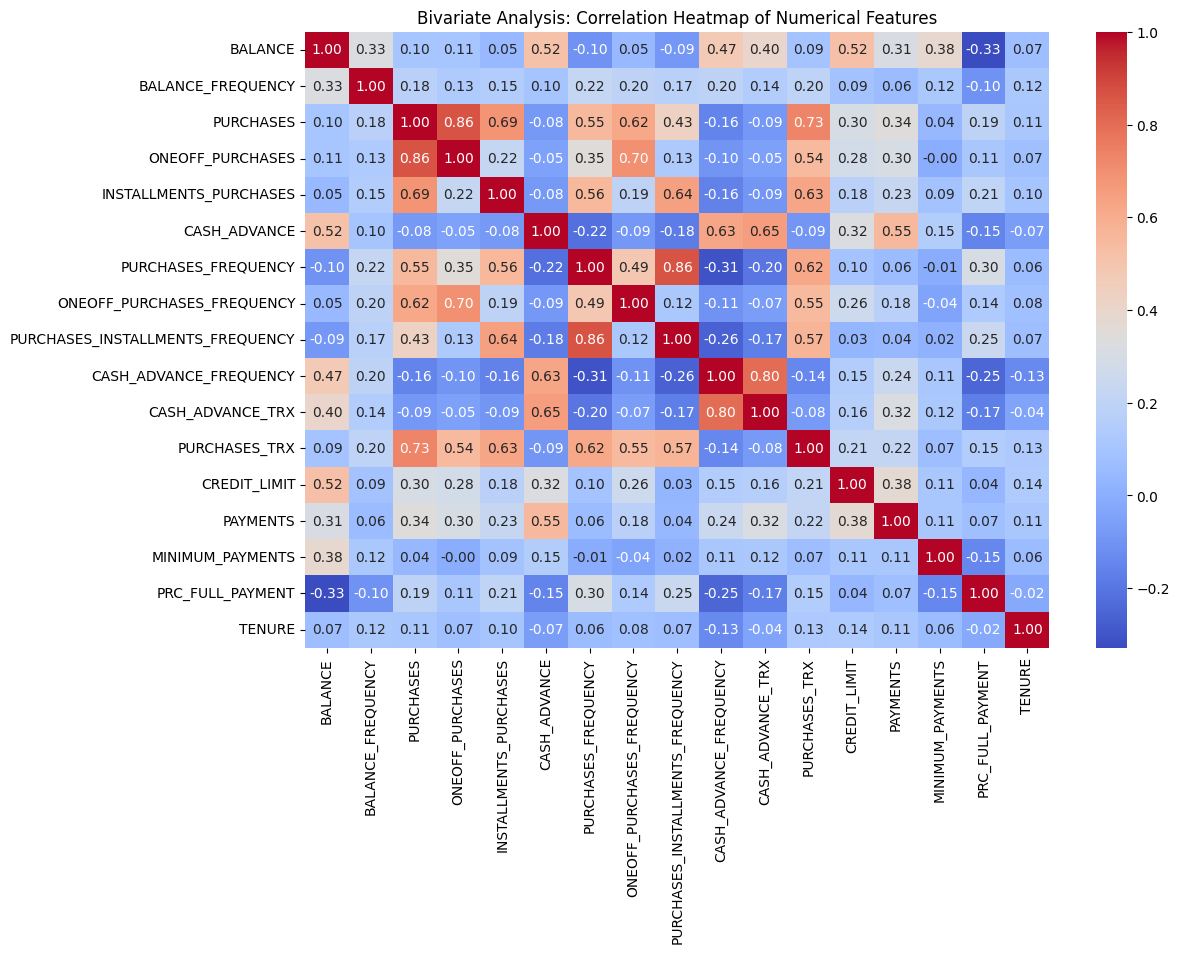

In [25]:
# 1. Correlation Heatmap for Numeric Features
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Bivariate Analysis: Correlation Heatmap of Numerical Features')
plt.show()

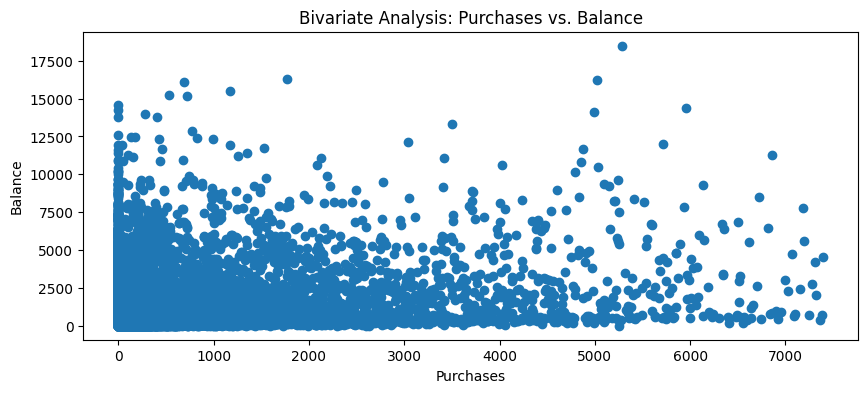

In [26]:
# 3. Scatter plot of purchases vs. balance
plt.figure(figsize=(10, 4))
plt.scatter(df['PURCHASES'], df['BALANCE'])
plt.title('Bivariate Analysis: Purchases vs. Balance')
plt.xlabel('Purchases')
plt.ylabel('Balance')
plt.show()

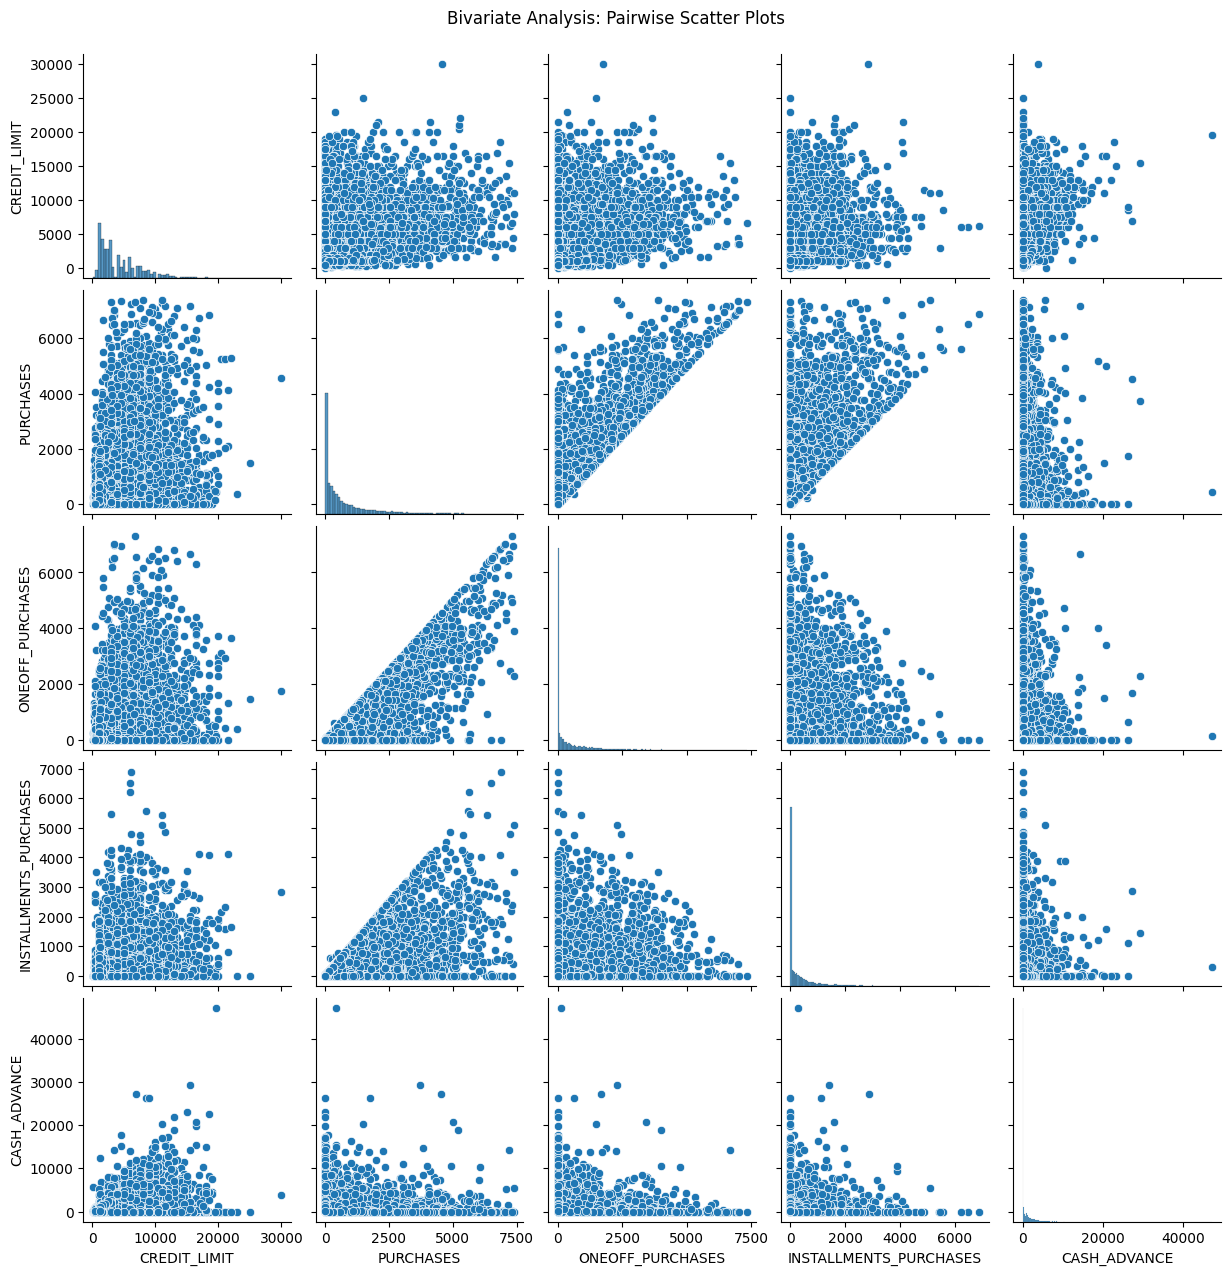

In [27]:
# 4. Pairwise Scatter Plots for Purchase Behavior and Credit Limit
sns.pairplot(df[['CREDIT_LIMIT', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']])
plt.suptitle('Bivariate Analysis: Pairwise Scatter Plots', y=1.02)
plt.show()

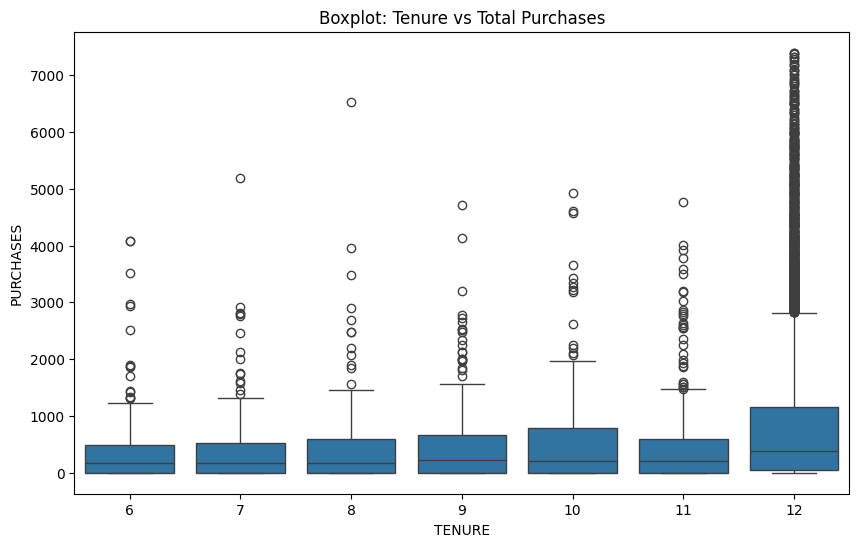

In [28]:
# 5. Boxplot for Credit Limit vs Purchase Categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='TENURE', y='PURCHASES', data=df)
plt.title('Boxplot: Tenure vs Total Purchases')
plt.show()

**(c) Multivariate Analysis**



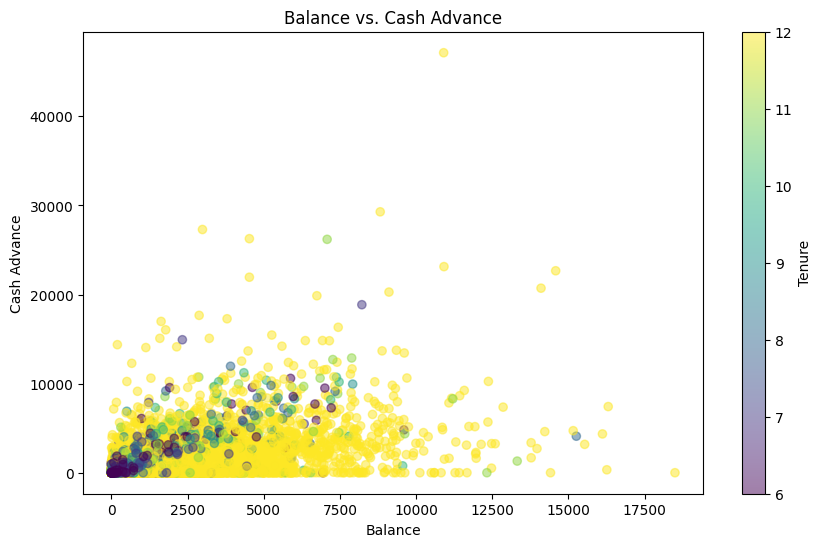

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df['BALANCE'], df['CASH_ADVANCE'], c=df['TENURE'], cmap='viridis', alpha=0.5)
plt.xlabel('Balance')
plt.ylabel('Cash Advance')
plt.title('Balance vs. Cash Advance')
_ = plt.colorbar(label='Tenure')

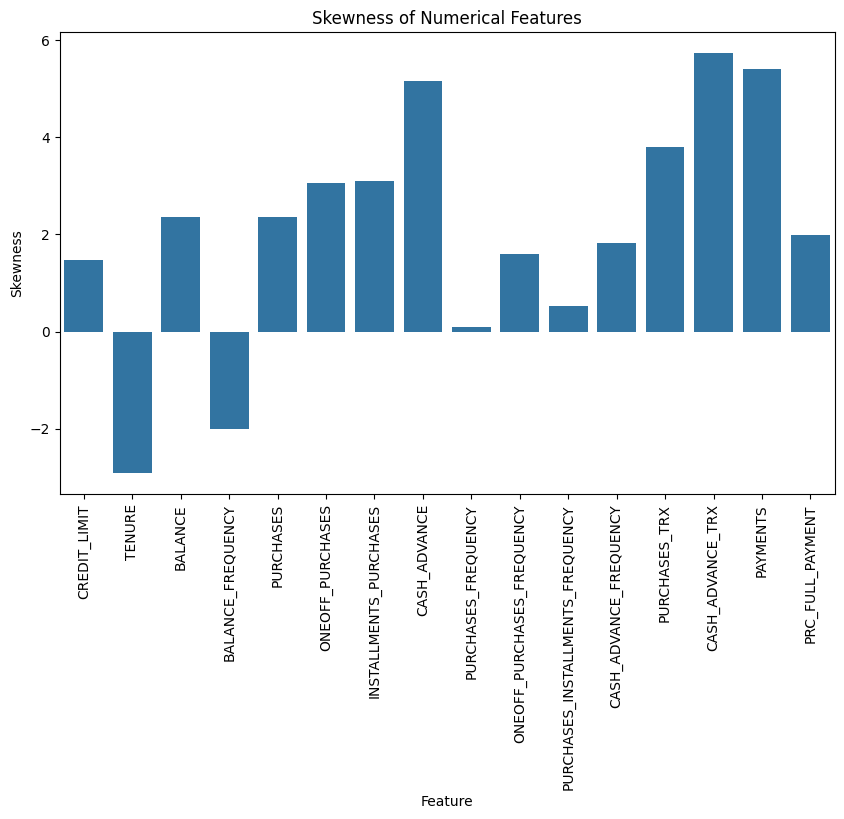

In [30]:
#Check for skewness
from scipy.stats import skew

# List of numeric columns in the dataset
numeric_columns = ['CREDIT_LIMIT', 'TENURE', 'BALANCE', 'BALANCE_FREQUENCY',
                   'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                   'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                   'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                   'PURCHASES_TRX', 'CASH_ADVANCE_TRX', 'PAYMENTS', 'PRC_FULL_PAYMENT']

# Compute skewness for each numeric feature
skewness_values = df[numeric_columns].apply(lambda x: skew(x.dropna()))

# Create a DataFrame to display skewness
skewness_df = pd.DataFrame({'Feature': skewness_values.index, 'Skewness': skewness_values.values})

# Plot skewness values
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Skewness', data=skewness_df)
plt.xticks(rotation=90)
plt.title('Skewness of Numerical Features')
plt.show()

In [31]:
# prompt: perform log transformtion on columns that have a skew greater than 1 or less than -1

# Identify columns with skewness greater than 1 or less than -1
skewed_columns = skewness_df[abs(skewness_df['Skewness']) > 1]['Feature'].tolist()

# Apply log transformation to skewed columns
for col in skewed_columns:
  df[col] = np.log1p(df[col])


### **Data Preprocessing**

In [32]:
#feature engineering
df['TOTAL_PURCHASES'] = df['ONEOFF_PURCHASES'] + df['INSTALLMENTS_PURCHASES']
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'TOTAL_PURCHASES'],
      dtype='object')

Splitting the Data into train and test data. In the ratio 80 and 20%.

In [33]:

#define X and Y variables
X = df.drop(columns=['PRC_FULL_PAYMENT'])
y = df['PRC_FULL_PAYMENT']
#splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
from sklearn.pipeline import Pipeline
# Define the pipeline
pipeline = Pipeline([
    ('scaling', StandardScaler()),  # Scale the data
    ('pca', PCA(n_components=2)), # Apply PCA (retaining 2 components)
])

# Fit the pipeline on the training data and transform both train and test sets
X_train_transformed = pipeline.fit_transform(X_train)  # Fit and transform on the training set
X_test_transformed = pipeline.transform(X_test)

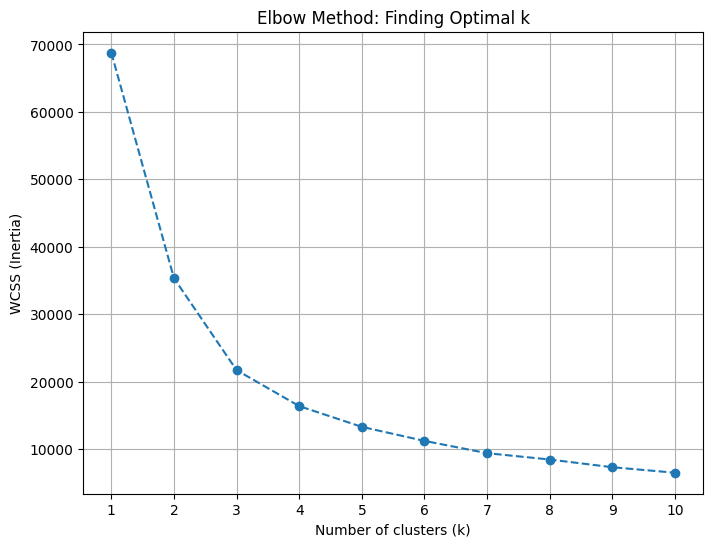

In [35]:
wcss = []
k_values = range(1, 11)  # Typically, you test k from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_transformed)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Step 3: Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method: Finding Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [36]:
# Fit KMeans with the optimal number of clusters (k=3) on the training data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_transformed)

# Step 4: Predict clusters for both train and test sets
train_clusters = kmeans.predict(X_train_transformed)
test_clusters = kmeans.predict(X_test_transformed)


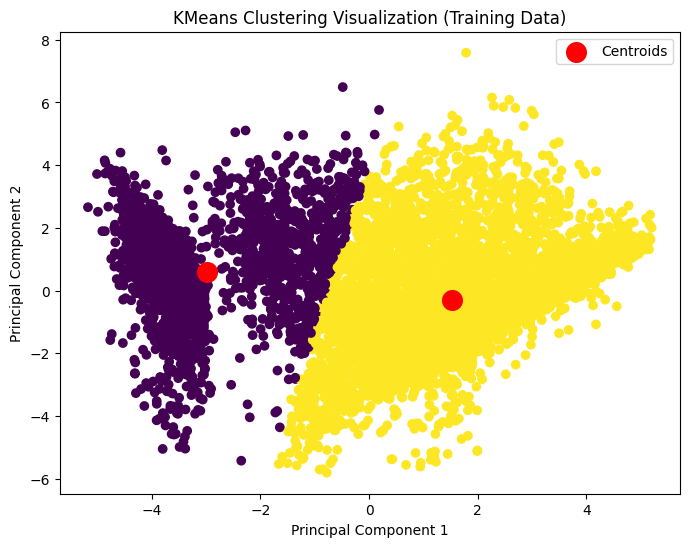

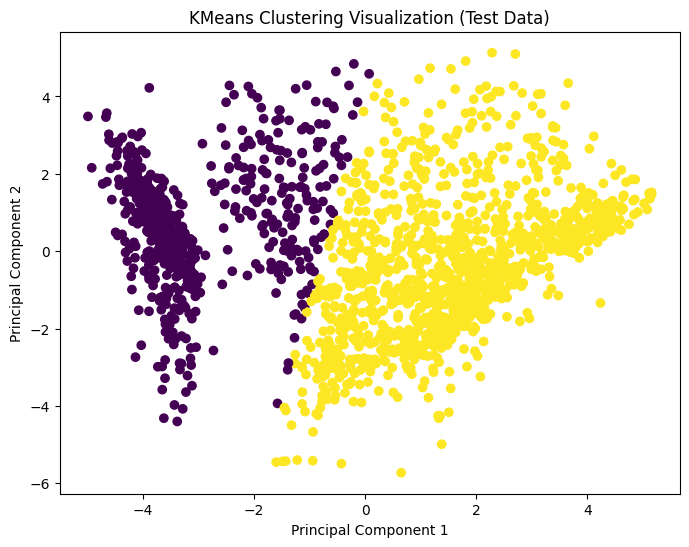

In [37]:
# prompt: visualize the clusters

# Visualize the clusters on the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=train_clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('KMeans Clustering Visualization (Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize the clusters on the test data (optional)
plt.figure(figsize=(8, 6))
plt.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], c=test_clusters, cmap='viridis')
plt.title('KMeans Clustering Visualization (Test Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [38]:
#evaluate the model on train and test data
silhouette_avg = silhouette_score(X_train_transformed, train_clusters)
print(f"Silhouette Score (Training Data): {silhouette_avg}")

silhouette_avg_test = silhouette_score(X_test_transformed, test_clusters)
print(f"Silhouette Score (Test Data): {silhouette_avg_test}")

Silhouette Score (Training Data): 0.4628023553874951
Silhouette Score (Test Data): 0.4698363062172193


In [39]:

# Try different values of k (number of clusters)
best_k = 0
best_score = -1
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_transformed)
    score = silhouette_score(X_train_transformed, kmeans.labels_)
    print(f"For k={k}, Silhouette Score is {score}")
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best number of clusters based on Silhouette Score: {best_k}")


For k=2, Silhouette Score is 0.4628023553874951
For k=3, Silhouette Score is 0.43615787334331235
For k=4, Silhouette Score is 0.44014354009629025
For k=5, Silhouette Score is 0.4116253941744532
For k=6, Silhouette Score is 0.3724030445657726
For k=7, Silhouette Score is 0.39233979067190305
For k=8, Silhouette Score is 0.37081302378911
For k=9, Silhouette Score is 0.3775193353744553
Best number of clusters based on Silhouette Score: 2


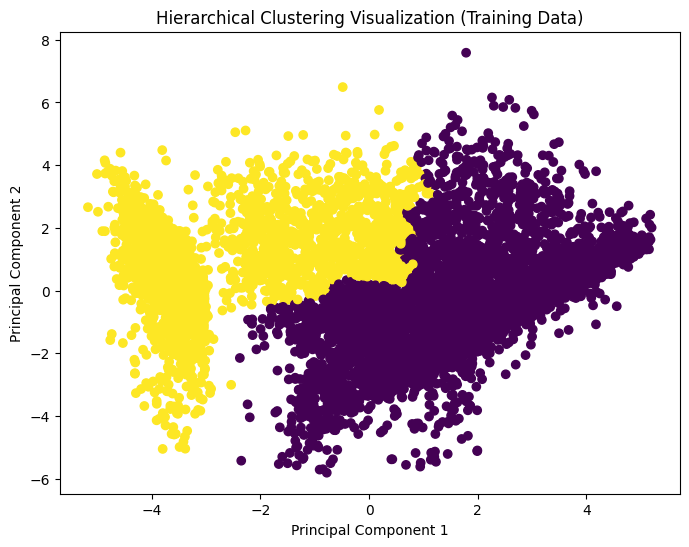

Silhouette Score (Training Data, Hierarchical Clustering): 0.43123563042852886
Silhouette Score (Test Data, Hierarchical Clustering): 0.4378174670928968


In [40]:


# Perform hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)  # You can adjust the number of clusters
agg_clustering.fit(X_train_transformed)

# Get the cluster labels for the training data
train_cluster_labels_agg = agg_clustering.labels_


# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=train_cluster_labels_agg, cmap='viridis')
plt.title('Hierarchical Clustering Visualization (Training Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Evaluate the model
silhouette_avg_agg = silhouette_score(X_train_transformed, train_cluster_labels_agg)
print(f"Silhouette Score (Training Data, Hierarchical Clustering): {silhouette_avg_agg}")

# Predict clusters for the test data
test_cluster_labels_agg = agg_clustering.fit_predict(X_test_transformed)

# Evaluate on test data (optional)
silhouette_avg_agg_test = silhouette_score(X_test_transformed, test_cluster_labels_agg)
print(f"Silhouette Score (Test Data, Hierarchical Clustering): {silhouette_avg_agg_test}")


In [41]:
# Define RFM columns
df['Monetary'] = df['TOTAL_PURCHASES']  # Total amount spent
df['Frequency'] = df['PURCHASES_TRX']  # Number of transactions
df['Recency'] = 12 - df['TENURE']  # Using TENURE as a proxy for recency

# Step 2: Rank customers by Recency, Frequency, Monetary (1 to 5 scale, where 5 is highest)
# Calculate quantiles without labels first
df['R_rank'] = pd.qcut(df['Recency'], 5, duplicates='drop', labels=False) # Assign integer labels directly
df['F_rank'] = pd.qcut(df['Frequency'], 5, duplicates='drop', labels=False) # Assign integer labels directly
df['M_rank'] = pd.qcut(df['Monetary'], 5, duplicates='drop', labels=False) # Assign integer labels directly

# Add 1 to the ranks to start from 1 instead of 0
df['R_rank'] = df['R_rank'] + 1
df['F_rank'] = df['F_rank'] + 1
df['M_rank'] = df['M_rank'] + 1


# Step 3: Combine RFM score
df['RFM_Score'] = df['R_rank'].astype(str) + df['F_rank'].astype(str) + df['M_rank'].astype(str)

# Display first few rows of the RFM scores
df[['Recency', 'Frequency', 'Monetary', 'R_rank', 'F_rank', 'M_rank', 'RFM_Score']].head()


,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score
0,9.435051,1.098612,4.568506,1,1,1,111
1,9.435051,0.000000,0.000000,1,1,1,111
2,9.435051,2.564949,6.651791,1,3,2,132
3,9.435051,0.693147,7.313220,1,1,3,113
4,9.435051,0.693147,2.833213,1,1,1,111


In [42]:
df[['Recency', 'Frequency', 'Monetary', 'R_rank', 'F_rank', 'M_rank', 'RFM_Score']].tail()

,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score
8945,10.05409,1.945910,5.677165,1,2,2,122
8946,10.05409,1.945910,5.707110,1,2,2,122
8947,10.05409,1.791759,4.979489,1,2,1,121
8948,10.05409,0.000000,0.000000,1,1,1,111
8949,10.05409,3.178054,6.997824,1,4,3,143


In [43]:
# Define segments based on RFM Score
def rfm_segment(df):
    if df['RFM_Score'] == '555':
        return 'Top Customer'
    elif df['RFM_Score'] == '111':
        return 'Low-Value Customer'
    elif df['R_rank'] == 5:
        return 'New Customer'
    elif df['R_rank'] <= 2 and df['F_rank'] >= 4:
        return 'At Risk'
    else:
        return 'Others'

df['Segment'] = df.apply(rfm_segment, axis=1)

# Count customers in each segment
segment_counts = df['Segment'].value_counts()
print(segment_counts)


Segment
Others                4061
Low-Value Customer    3053
At Risk               1701
Name: count, dtype: int64


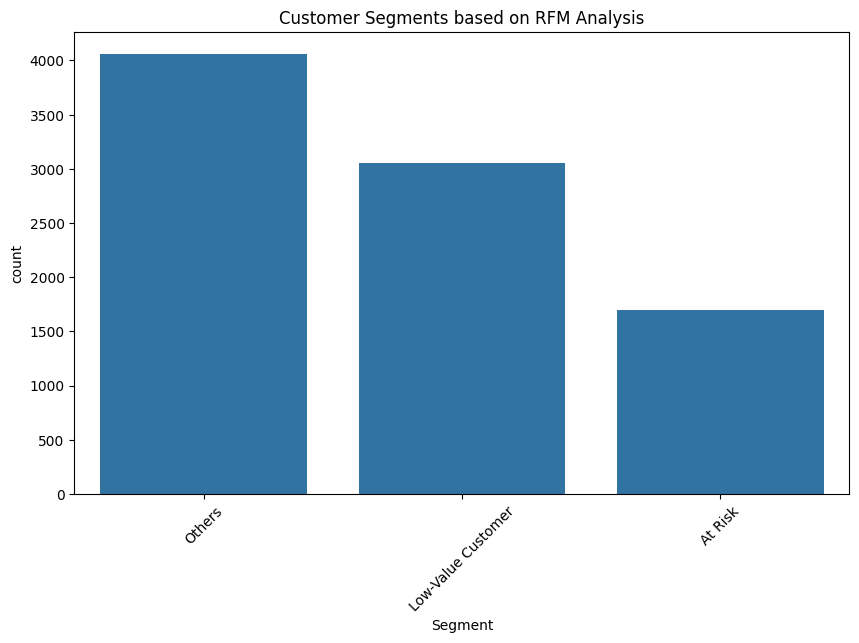

In [44]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=df, order=df['Segment'].value_counts().index)
plt.title('Customer Segments based on RFM Analysis')
plt.xticks(rotation=45)
plt.show();
